In [61]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error

import mlflow

from ucimlrepo import fetch_ucirepo 

In [ ]:
# fetch dataset 
#energy_efficiency = fetch_ucirepo(id=242) 

# data (as pandas dataframes)
#X_temp = energy_efficiency.data.features 
#y_temp = energy_efficiency.data.targets

# concat to one main dataframe
#df_temp = pd.concat([X_temp, y_temp], axis=1)

# create "data" directory
#os.makedirs("data", exist_ok=True)

# export dataframe to csv
#df_temp.to_csv("data/energy_efficient.csv", index=False)

In [28]:
def read_dataframe(filename):
    df = pd.read_csv(filename)

    df = df.rename(columns={
        "X1": "relative_compactness",
        "X2": "surface_area",
        "X3": "wall_area",
        "X4": "roof_area",
        "X5": "overall_height",
        "X6": "orientation",
        "X7": "glazing_area",
        "X8": "glazing_area_distribution",
        "Y1": "heating_load",
        "Y2": "cooling_load"
    })

    return df

In [ ]:
# load data
df = read_dataframe("data/energy_efficient.csv")
df

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


<function matplotlib.pyplot.show(close=None, block=None)>

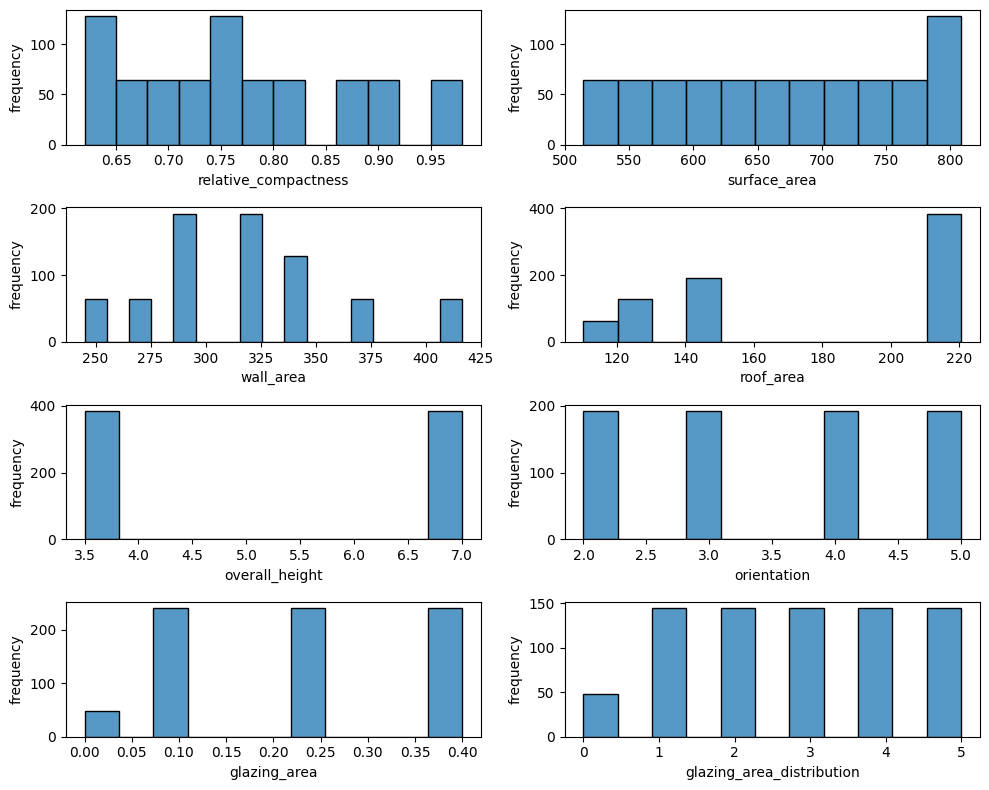

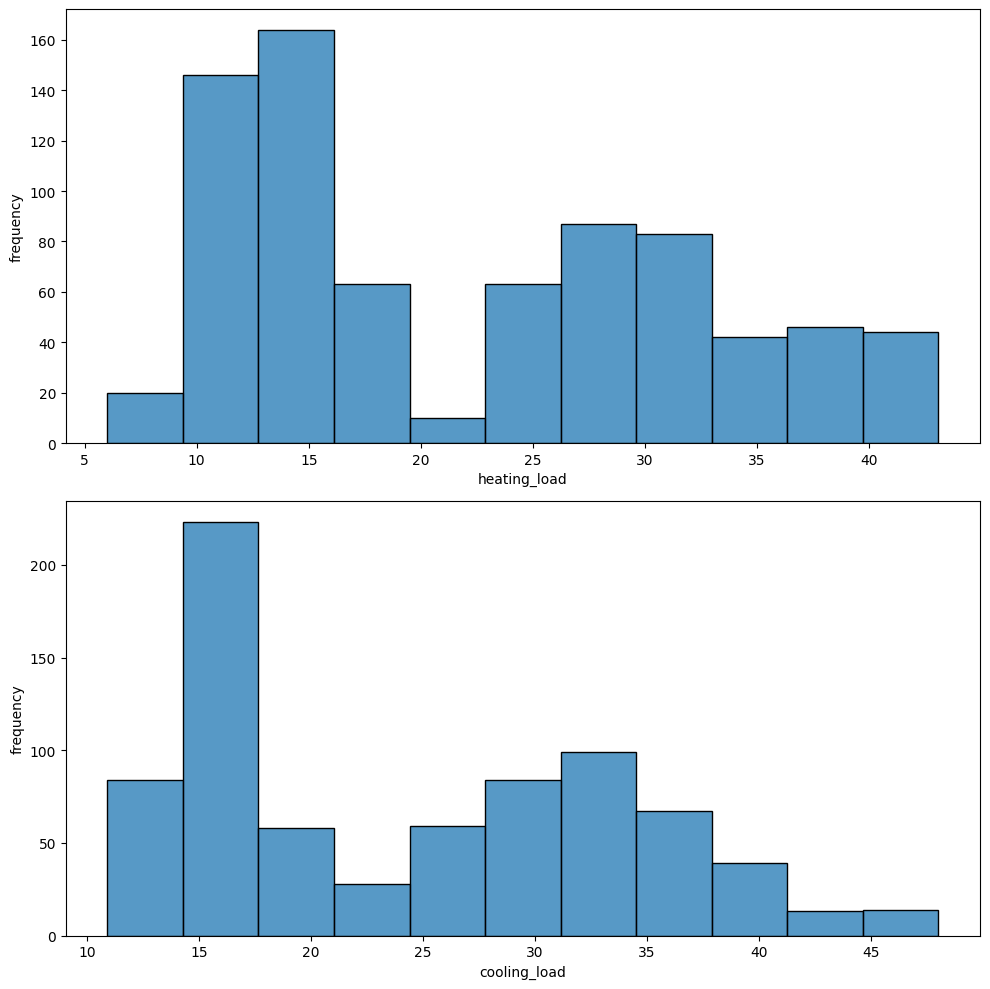

In [48]:
# features histogram
plt.figure(figsize=(10, 8))
for i in range(8):
    plt.subplot(4, 2, i+1)
    sns.histplot(data=df, x=df.columns[i])
    plt.title("")
    plt.xlabel(df.columns[i])
    plt.ylabel("frequency")
plt.tight_layout()
plt.show

# targets histogram
plt.figure(figsize=(10,10))
for i in range(8, 10):
    plt.subplot(2, 1, i-7)
    sns.histplot(data=df, x=df.columns[i])
    plt.title("")
    plt.xlabel(df.columns[i])
    plt.ylabel("frequency")
plt.tight_layout()
plt.show

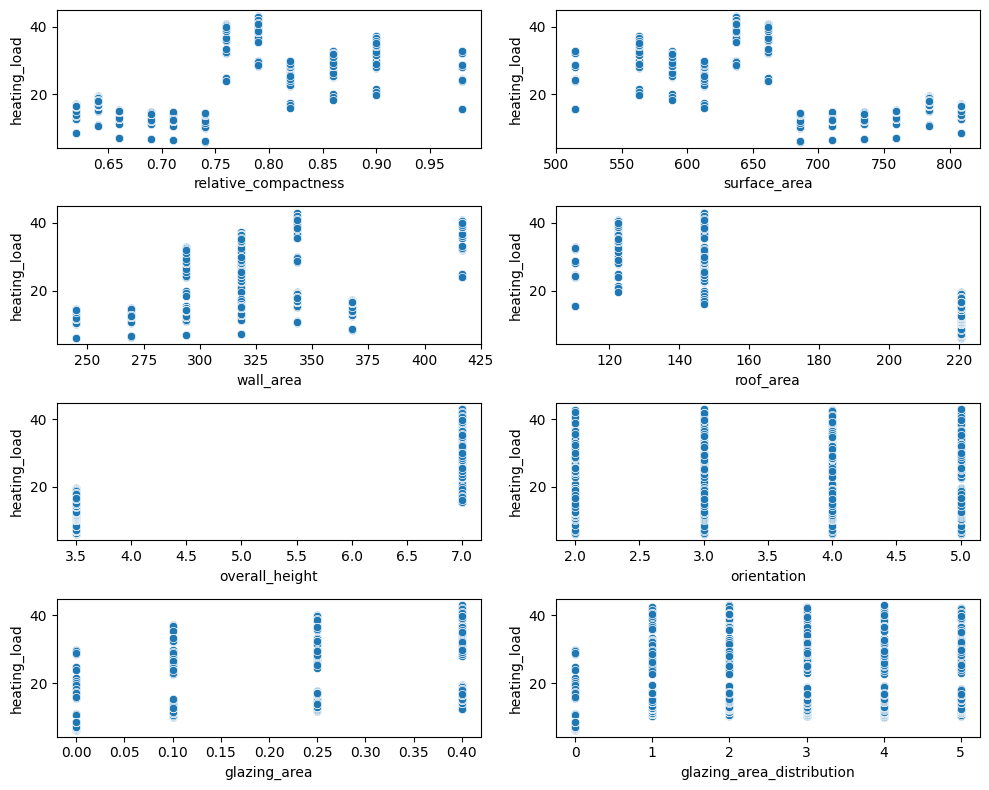

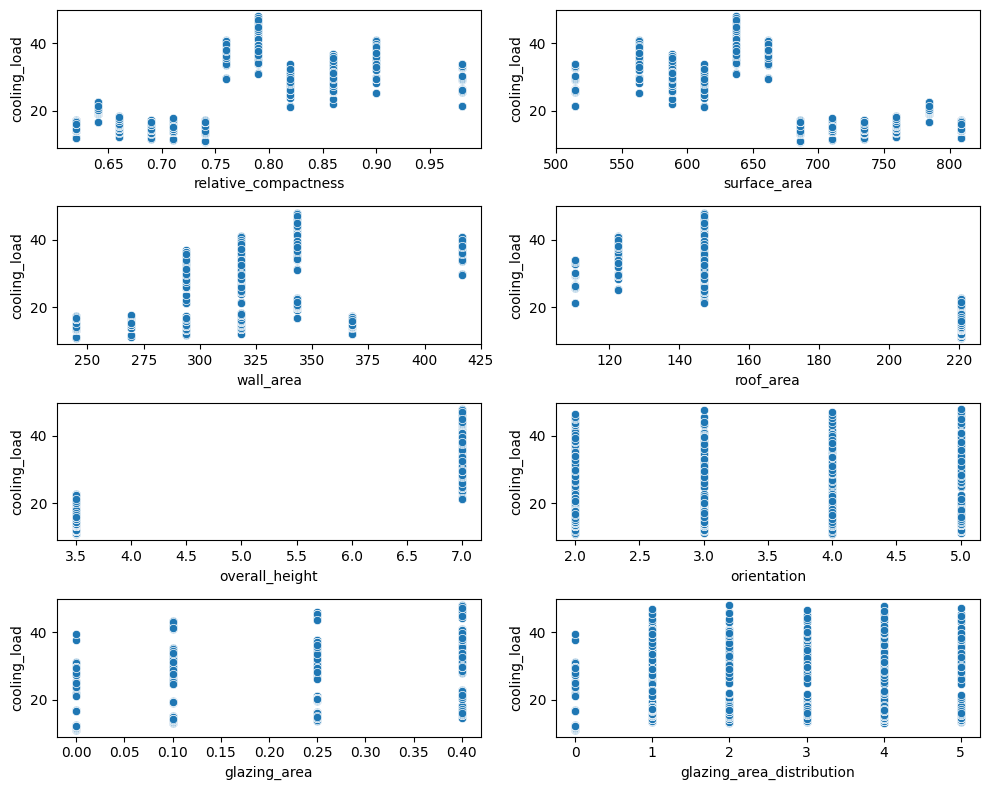

In [50]:
# heating load scatterplot
plt.figure(figsize=(10, 8))
for i in range(8):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(data=df, x=df.columns[i], y=df.columns[8])
    plt.title("")
plt.tight_layout()
plt.show()

# cooling load scatterplot
plt.figure(figsize=(10, 8))
for i in range(8):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(data=df, x=df.columns[i], y=df.columns[9])
    plt.title("")
plt.tight_layout()
plt.show()

In [52]:
# categorical & numerical column
categorical = ["orientation", "glazing_area_distribution"]
numerical = ["relative_compactness", "surface_area", "wall_area", "roof_area", "overall_height", "glazing_area"]
df[categorical] = df[categorical].astype(str)

In [53]:
# split df to df_train and df_test
df_train, df_test = train_test_split(df, test_size=0.2, random_state=314)

len(df_train), len(df_test)

(614, 154)

In [54]:
# encode df_train using dictvectorizer for X_train
dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient="records")
X_train = dv.fit_transform(train_dicts)

test_dicts = df_test[categorical + numerical].to_dict(orient="records")
X_test = dv.transform(test_dicts)

In [67]:
# use only one target cooling_load
y_train = df_train["cooling_load"].values
y_test = df_test["cooling_load"].values

In [68]:
# linear regression model (baseline)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(root_mean_squared_error(y_test, y_pred))

3.104865275362033


In [69]:
# create "models" folder
os.makedirs("models", exist_ok=True)

# save models using pickle
with open("models/lin_reg.bin", "wb") as f_out:
    pickle.dump((dv, lr), f_out)